In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Create some toy data with 3 classes which are not linearly separable

In [3]:
r = np.tile(np.r_[0:1:100j],3)
t = np.r_[0:np.pi*4:300j] + np.random.rand(300)
x_train = np.c_[r*np.sin(t), r*np.cos(t)]
y_train = np.arange(3).repeat(100)

In [5]:
#plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=plt.cm.Paired)

## Create a Neural Network Model

In [97]:
class NeuralNets(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, X):
        out = self.fc1(X)
        out = self.relu1(out)
        out = self.fc2(out)
        
        return out
    
    def predict(self, X):
        y_score = self.forward(X)
        y_pred = torch.max(y_score,1)[1]
        
        return y_pred
    
    def plot_decision_boundary(self, x_train, y_train):
        y_pred = self.predict(torch.from_numpy(x_train.astype(np.float32)))
        x0_min, x1_min = x_train.min(0) - 0.5
        x0_max, x1_max = x_train.max(0) + 0.5
        x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,0.01), np.arange(x1_min, x1_max,0.01))
        x = np.c_[x0.ravel(), x1.ravel()]
        y = self.predict(torch.from_numpy(x.astype(np.float32)))
        
        
        plt.pcolormesh(x0,x1,y.reshape(x0.shape),cmap=plt.cm.Paired)
        plt.scatter(x_train[:,0], x_train[:,1], c=y_train, s=50, edgecolors='k', cmap=plt.cm.Paired)
        plt.show()

In [98]:
model = NeuralNets(2,64,3)

In [99]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Loss is 1.1082885265350342 at epoch 0


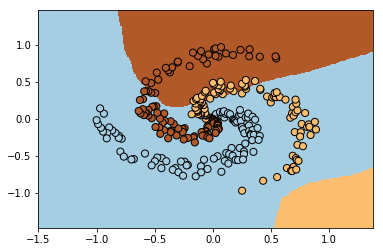

Loss is 0.023028861731290817 at epoch 1000


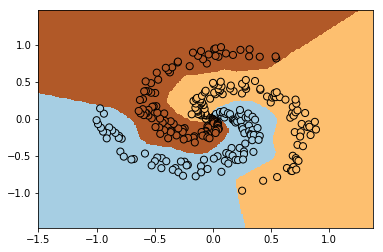

Loss is 0.01494543720036745 at epoch 2000


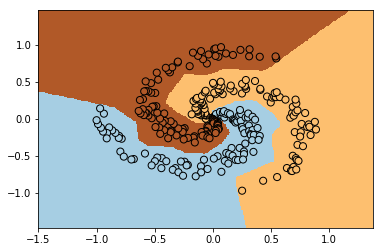

Loss is 0.012673151679337025 at epoch 3000


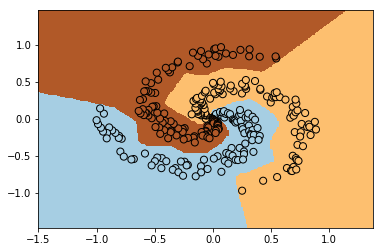

Loss is 0.011773177422583103 at epoch 4000


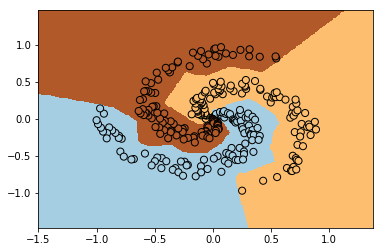

Loss is 0.01137221697717905 at epoch 5000


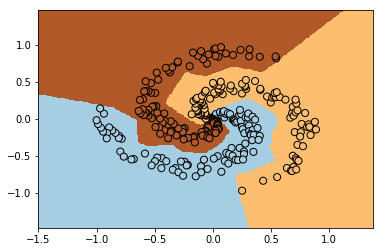

Loss is 0.011182270012795925 at epoch 6000


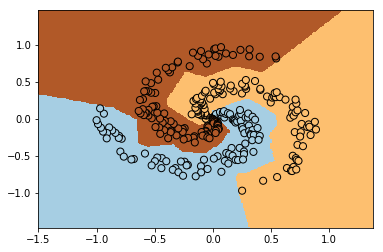

Loss is 0.011088984087109566 at epoch 7000


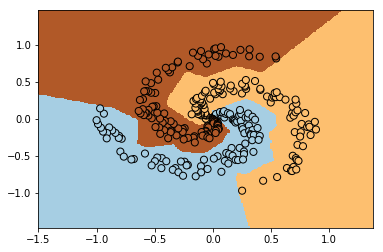

Loss is 0.011042773723602295 at epoch 8000


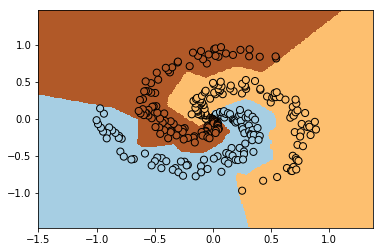

Loss is 0.011032595299184322 at epoch 9000


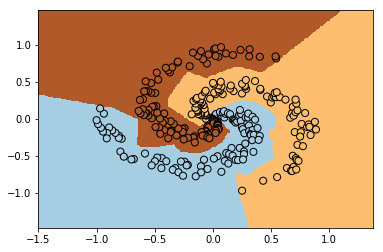

Loss is 0.011003976687788963 at epoch 10000


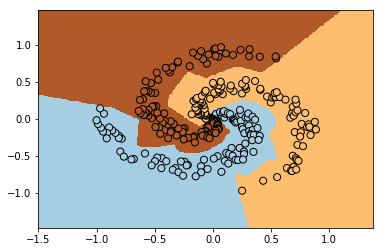

In [100]:
for epoch in range(10001):
    y_score = model(torch.from_numpy(x_train.astype(np.float32)))
    loss = loss_fn(y_score, torch.from_numpy(y_train.astype(np.int64)))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%1000==0:
        print(f'Loss is {loss} at epoch {epoch}')
        model.plot_decision_boundary(x_train, y_train)